In [185]:
import pandas as pd
import numpy as np

In [186]:
data=pd.read_csv('AirPassengers.csv')

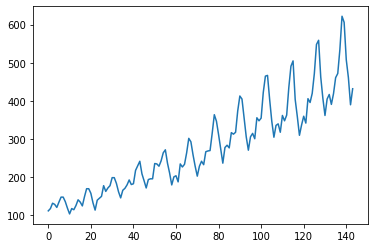

In [188]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['#Passengers'])

In [189]:
data=data.set_index('Month')


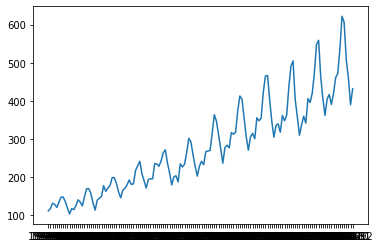

In [190]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['#Passengers'])

In [192]:

data.index = pd.to_datetime(data.index)

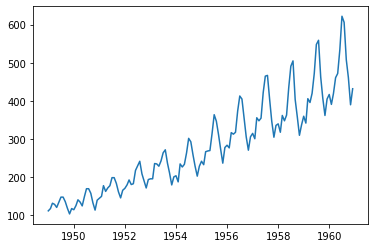

In [193]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['#Passengers'])

In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [194]:
r_mean=data.rolling(2).mean()
r_mean.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,115.0
1949-03-01,125.0
1949-04-01,130.5
1949-05-01,125.0


In [12]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


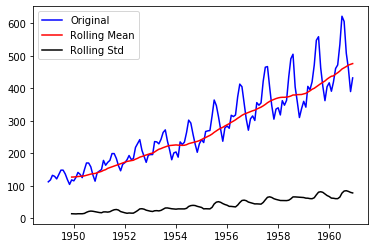

In [196]:
r_mean=data.rolling(12).mean()
r_std=data.rolling(12).std()
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(r_mean, color='red', label='Rolling Mean')
std = plt.plot(r_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')

In [197]:
from statsmodels.tsa.stattools import adfuller

In [198]:
st=adfuller(data['#Passengers'].dropna())

In [199]:
st

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [202]:
def stationary_test(ts_data):
    r_mean=ts_data.rolling(12).mean()
    r_std=ts_data.rolling(12).std()
    orig = plt.plot(ts_data, color='blue',label='Original')
    mean = plt.plot(r_mean, color='red', label='Rolling Mean')
    std = plt.plot(r_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    st=adfuller(ts_data.iloc[:,0].dropna())
    print('The Test Statistics P value is', st[1])
    if st[1]>0.05:
        print('The Signal is non stationary')
    else:
        print('The Signal is stationary')

The Test Statistics P value is 0.9918802434376409
The Signal is non stationary


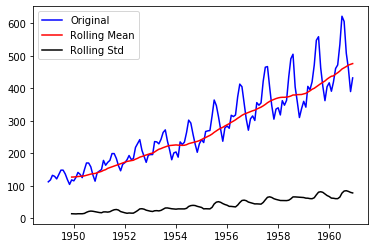

In [203]:
stationary_test(data)

In [205]:
r_mean=data.rolling(12).mean()
data1=data-r_mean
data1=data1.dropna()

The Test Statistics P value is 0.02210413947387874
The Signal is stationary


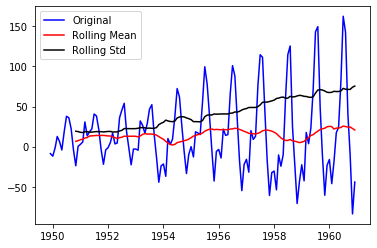

In [206]:
stationary_test(data1)

The Test Statistics P value is 0.022234630001243844


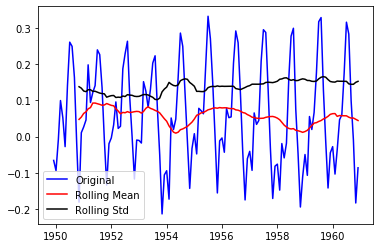

In [25]:
data_log=np.log(data)
r_mean=data_log.rolling(12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

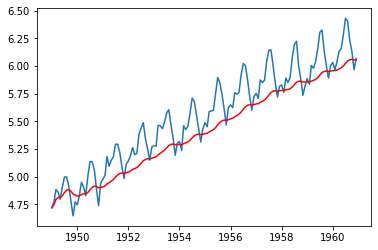

In [26]:
expwighted_avg= data_log.ewm(halflife=12).mean()
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

The Test Statistics P value is 0.005736938801511851


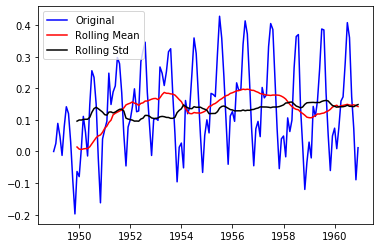

In [34]:
r_mean=data_log.ewm(halflife=12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

In [209]:

data_diff=data.diff(2)

The Test Statistics P value is 0.03862975767698849
The Signal is stationary


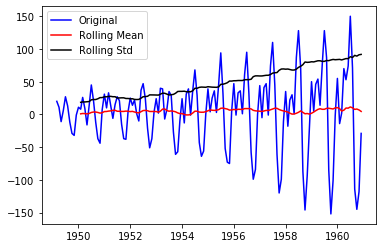

In [210]:
stationary_test(data_diff.dropna())

The Test Statistics P value is 7.419304549378255e-13


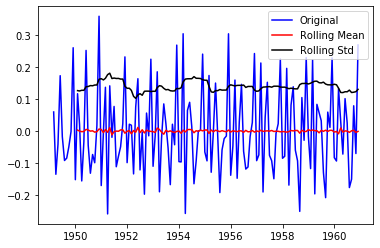

In [37]:
data_diff=data_log.diff().diff()
stationary_test(data_diff.dropna())

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

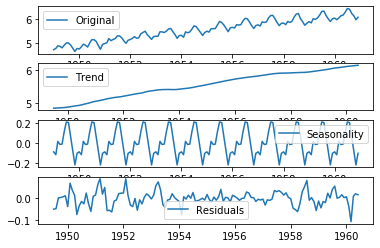

In [43]:
plt.subplot(4,1,1)
plt.plot(data_log, label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.

The Test Statistics P value is 2.8850589033233625e-08


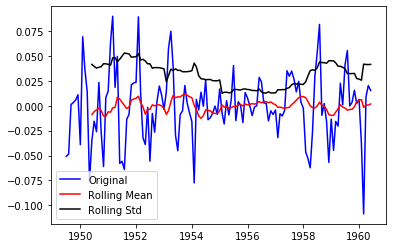

In [44]:
stationary_test(residual)

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

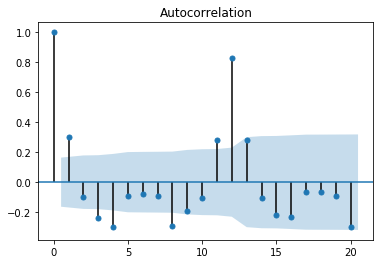

In [222]:
plot_acf(data.diff().dropna(),lags=20);

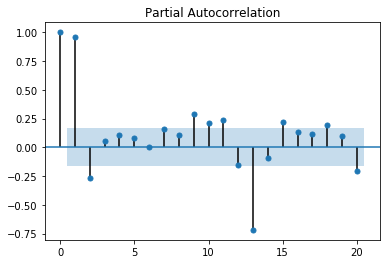

In [223]:
plot_pacf(data.dropna(),lags=20);

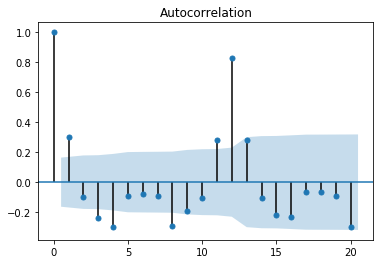

In [212]:
from pmdarima.arima.utils import ndiffs
ndiffs(data,test='adf') #adf,kpss,pp

0

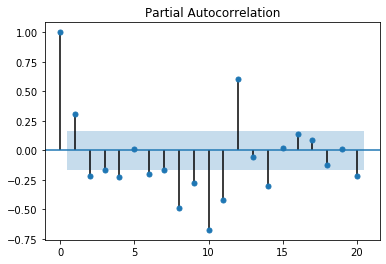

In [78]:
plot_pacf(data.diff().dropna(),lags=20);

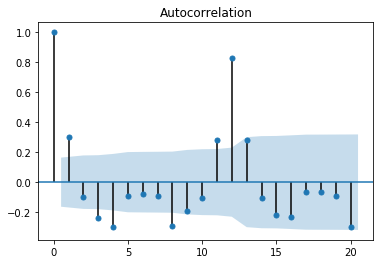

In [79]:
plot_acf(data.diff().dropna(),lags=20);

In [229]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(3, 0, 3))  
results_ARIMA = model.fit() 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


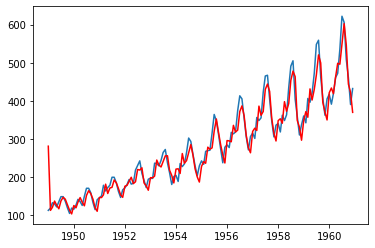

In [230]:
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='red')

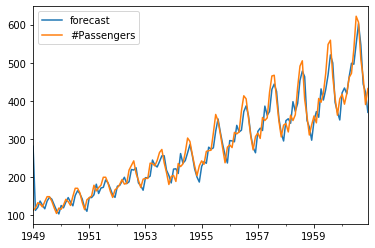

In [231]:
# Actual vs Fitted
results_ARIMA.plot_predict()
plt.show()

In [232]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(3, 3)   Log Likelihood                -679.869
Method:                       css-mle   S.D. of innovations             25.505
Date:                Fri, 18 Oct 2019   AIC                           1375.739
Time:                        12:51:42   BIC                           1399.497
Sample:                    01-01-1949   HQIC                          1385.393
                         - 12-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               280.5823        nan        nan        nan         nan         nan
ar.L1.#Passengers     2.6278      0.000   2.55e+04      0.000       2.628       2.628
ar.L2.#Passengers    -2.

C:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


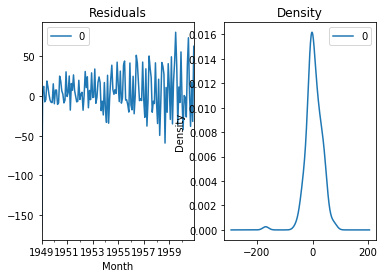

In [128]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [135]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [233]:


# Create Training and Test
train = data['#Passengers'][:130]
test = data['#Passengers'][130:]

In [234]:
# Forecast
fc, se, conf = results_ARIMA.forecast(14, alpha=0.05)  # 95% conf

In [239]:
fc

array([445.744403  , 458.10851808, 479.98748359, 504.75469254,
       525.87543233, 538.52631359, 540.58905385, 532.84734777,
       518.43542389, 501.76766469, 487.2800355 , 478.32046933,
       476.44683871, 481.25771775])

In [235]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

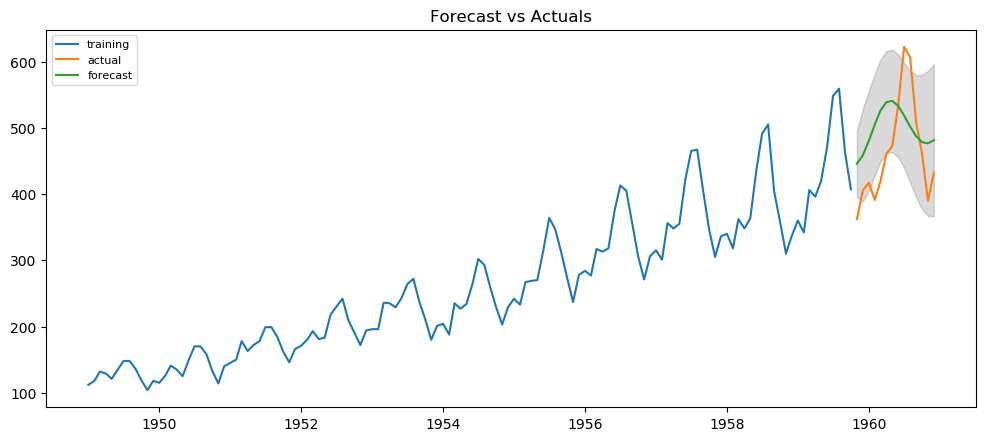

In [236]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [175]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

forecast_accuracy(fc, test.values)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.15211264665499474,
 'me': 34.924385329338435,
 'mae': 67.87717506640524,
 'mpe': 0.0973534940843895,
 'rmse': 76.11160408122058,
 'acf1': 0.7105618191932824,
 'corr': 0.4800760670062286}

In [238]:
# metrics
from statsmodels.tsa.stattools import acf
mape = np.mean(np.abs(fc - test)/np.abs(test))  # MAPE
me = np.mean(fc - test)             # ME
mae = np.mean(np.abs(fc - test))    # MAE
mpe = np.mean((fc - test)/test)   # MPE
rmse = np.mean((fc - test)**2)**.5  # RMSE
corr = np.corrcoef(fc, test)[0,1]   # corr
acf1 = acf(fc-test)[1]              # ACF1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [177]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [178]:
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Fit ARIMA: order=(1, 0, 1); AIC=1409.748, BIC=1421.628, Fit time=0.535 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1790.368, BIC=1796.307, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1428.179, BIC=1437.089, Fit time=0.207 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1618.863, BIC=1627.772, Fit time=0.128 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1408.249, BIC=1423.098, Fit time=0.280 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1413.639, BIC=1425.518, Fit time=0.137 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1433.074, BIC=1450.893, Fit time=1.143 seconds
Fit ARIMA: order=(3, 0, 2); AIC=1380.673, BIC=1401.462, Fit time=0.580 seconds
Fit ARIMA: order=(3, 0, 1); AIC=1395.289, BIC=1413.108, Fit time=0.529 seconds
Fit ARIMA: order=(3, 0, 3); AIC=1375.739, BIC=1399.497, Fit time=1.661 seconds
Fit ARIMA: order=(2, 0, 3); AIC=1550.423, BIC=1571.211, Fit time=1.231 seconds
Total fit time: 6.503 seconds


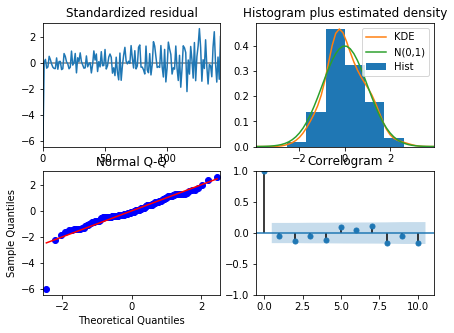

In [179]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [240]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.678 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.455 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=1.294 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.239 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=1.460 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.167, BIC=1034.418, Fit time=5.367 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.846, BIC=1048.222, Fit time=4.359 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.212, BIC=1038.338, Fit time=5.951 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.532
Date:                            Fri, 18 Oct 2019   AIC                           1015.065
Time:                                    14:42:31   BIC                           1038.066
Sample:                                         0   HQIC                          1024.411
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.018      0.017      0.986      -0.036       0.036
ar.L1          0.5292      0.100      5.294      0.000       0.333       0.725
ar.L2          0.2590      0.101      2.552      0.011       0.060       0.458
ma.L1         -0.9760      0.062    -15.670      0.000      -1.098      -0.854
ar.S.L12       0.7284      0.428      1.701      0.089      -0.111       1.568
ar.S.L24       0.2636      0.130      2.020      0.043       0.008       0.519
ma.S.L12      -0.9613      1.154     -0.833      0.405      -3.224       1.301
sigma2       116.1955     75.228      1.545      0.122     -31.249     263.640
===================================================================================
Ljung-Box (Q):                       51.61   Jarque-Bera (JB):                11.60
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

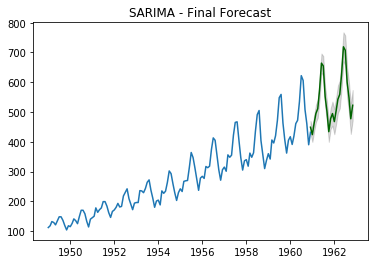

In [241]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods,freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()